In [120]:
import pandas as pd,numpy as np
import missingno as msno 
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt

# Data Exploration

In [121]:

data = pd.read_csv(r'models\data\data.csv', delimiter=';').drop(columns="duration")

In [122]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [123]:
data.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [124]:
numeric_columns = data.select_dtypes(exclude=['object']).columns
non_numeric_columns = data.select_dtypes(include=['object']).columns
for column in non_numeric_columns:
    print(f"Unique values in column '{column}':")
    print(data[column].unique())
    print("\n")

Unique values in column 'job':
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


Unique values in column 'marital':
['married' 'single' 'divorced' 'unknown']


Unique values in column 'education':
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


Unique values in column 'default':
['no' 'unknown' 'yes']


Unique values in column 'housing':
['no' 'yes' 'unknown']


Unique values in column 'loan':
['no' 'yes' 'unknown']


Unique values in column 'contact':
['telephone' 'cellular']


Unique values in column 'month':
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']


Unique values in column 'day_of_week':
['mon' 'tue' 'wed' 'thu' 'fri']


Unique values in column 'poutcome':
['nonexistent' 'failure' 'success']


Unique values in column 'y':
['no' 'yes']




Nous observons de nombreuses valeurs `unknown` qui seront traitées comme des `NaN`s. De plus, les variables sont catégorielles, nous allons donc changer leur type en conséquence.


## Handling Missing Values

In [125]:
(data=="unknown").sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

<Axes: >

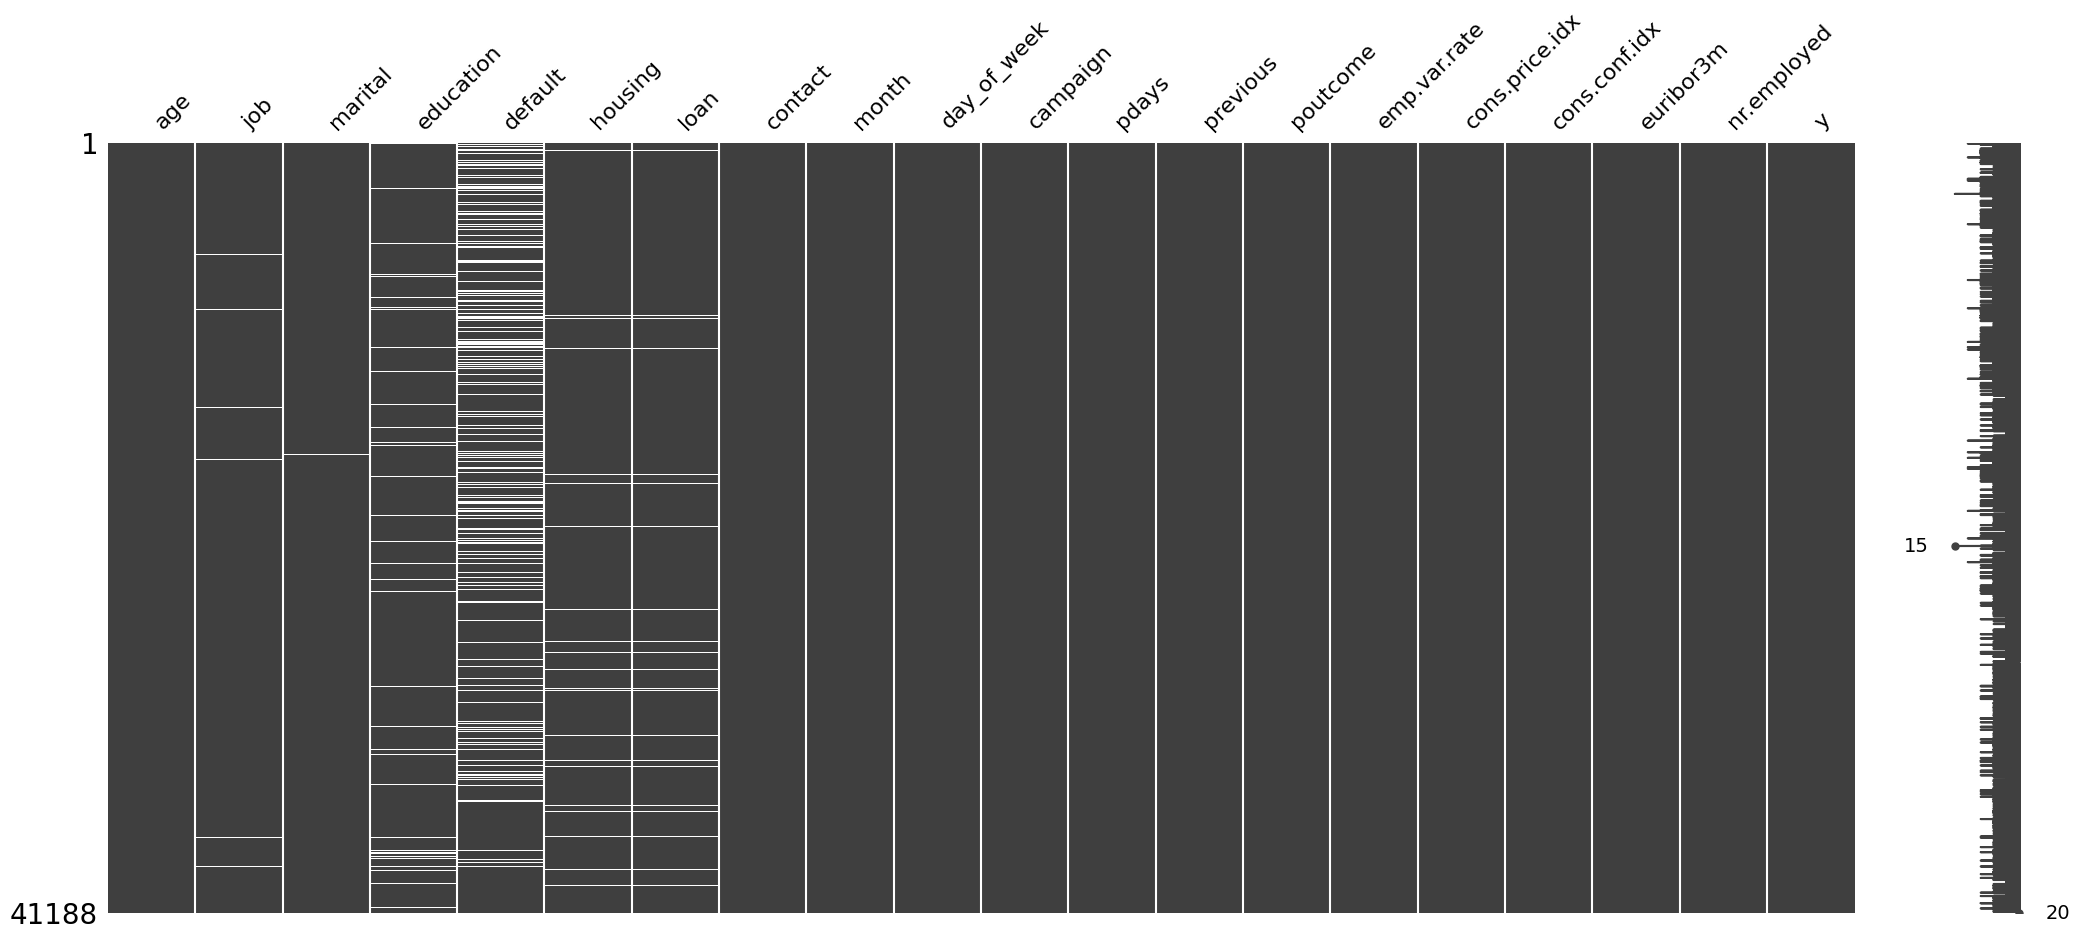

In [126]:
data.replace('unknown', np.nan, inplace=True)
msno.matrix(data) 

In [127]:
for column in data.select_dtypes(include='object').columns:
            data[column] = data[column].astype('category')
            
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [128]:
print(f"We have {data.isna().sum().sum()} missing values")
print(f"that is {data.isna().sum().sum()/data.size:.2%} of the dataset")

We have 12718 missing values
that is 1.54% of the dataset


<Axes: >

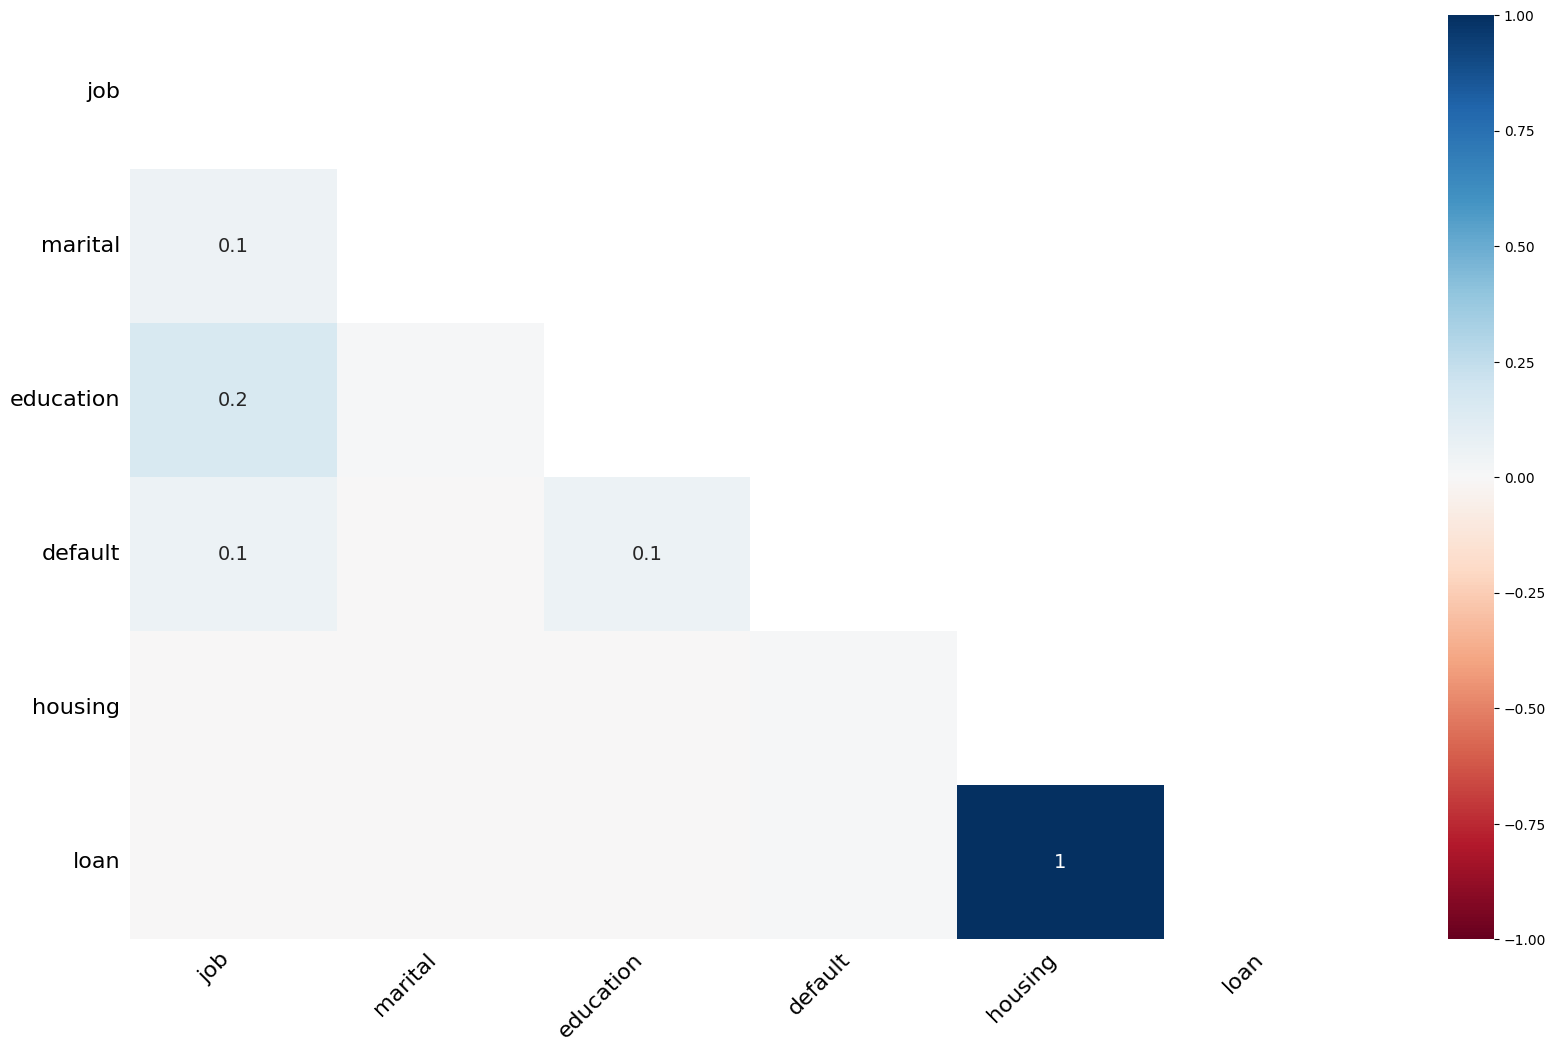

In [129]:
msno.heatmap(data)

In [130]:
class CategoricalEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.categories_ = {col: X[col].cat.categories for col in X.select_dtypes(include='category').columns}
        return self

    def transform(self, X):
        X_copy = X.copy()
        for column in X_copy.select_dtypes(include='category').columns:
            X_copy[column] = X_copy[column].cat.codes
        return X_copy

    def inverse_transform(self, X):
        X_copy = X.copy()
        try:
            for column in X_copy.select_dtypes(include='float').columns:
                X_copy[column] = X_copy[column].astype(int)
            
        except ValueError:
            raise ValueError("Data contains non-int values, can't convert to category")
        for column, categories in self.categories_.items():
            X_copy[column] = pd.Categorical.from_codes(X_copy[column], categories)
        return X_copy


In [131]:
encoder = CategoricalEncoder()
data_encoded = encoder.fit_transform(data)

In [132]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5)
knn_imputer.fit(data_encoded.replace(-1, np.nan))
# data_knn_imputed = knn_imputer.transform(data_encoded.replace(-1, np.nan))
# data_knn_imputed_df = pd.DataFrame(data_knn_imputed, columns=data.columns)
# data_knn_imputed_df=encoder.inverse_transform(data_knn_imputed_df)
# data_knn_imputed_df.to_csv(r'models\data\data_impute_knn.csv', index=False, sep=';')
data=pd.read_csv(r'models\data\data_impute_knn.csv', delimiter=';').drop(columns="duration")
for column in data.select_dtypes(include='object').columns:
    data[column] = data[column].astype('category')

In [133]:
data_analysis = data.copy()
Colsdrop=[]


## Correlation Analysis

In [134]:
from models.preparation import point_biserial_correlation


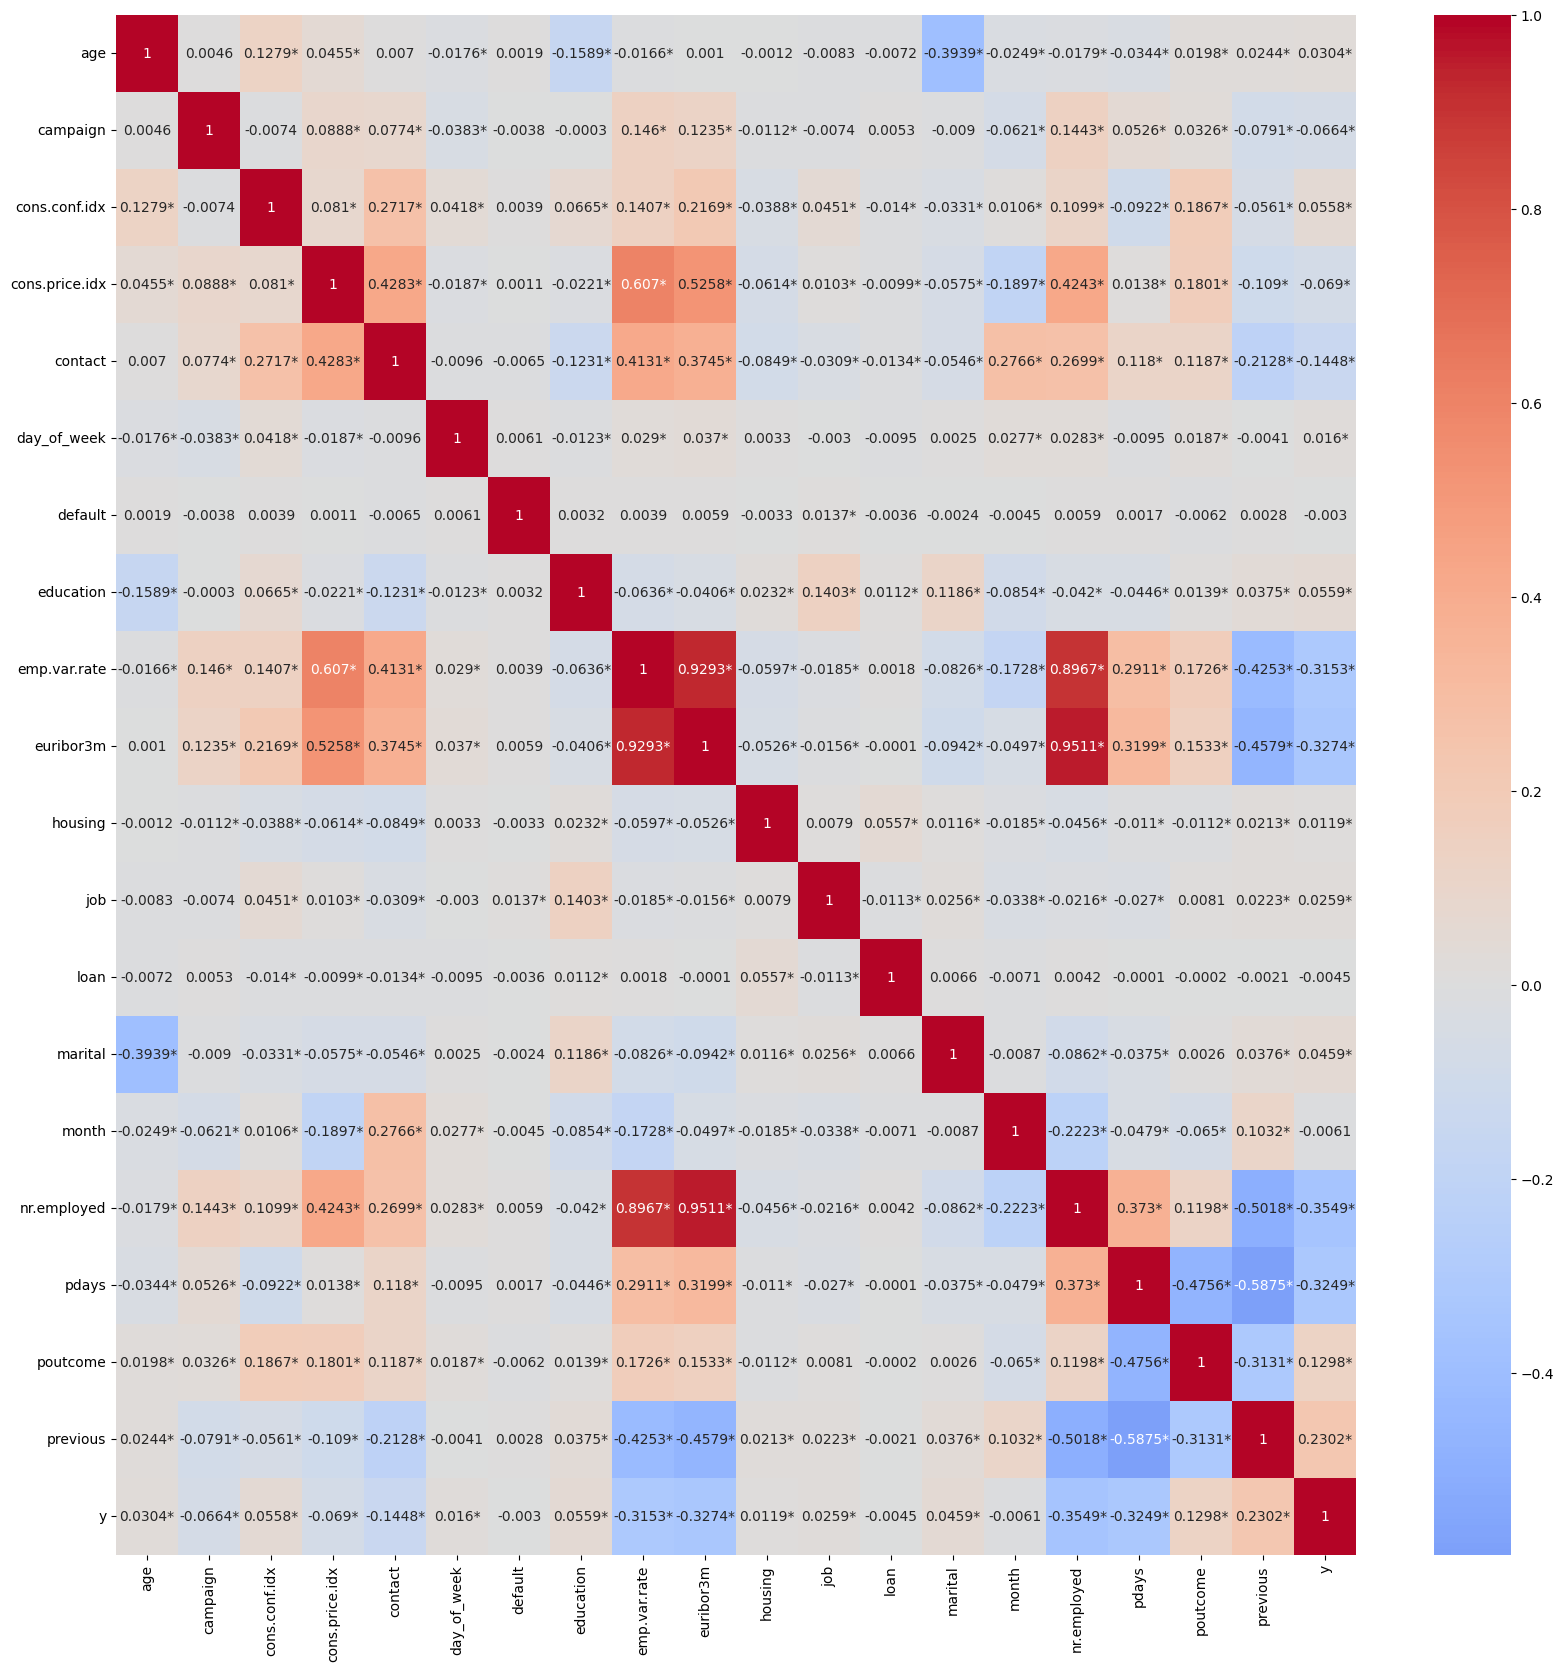

In [135]:
point_biserial_correlation(data,plot=True)


- Strong Correlations (|r| > 0.7):
  1. **Economic Variables:**
     - `emp.var.rate` and `euribor3m`: **0.9722**  
       These variables are highly correlated, as both reflect economic conditions.
     - `emp.var.rate` and `nr.employed`: **0.9070**  
       This strong correlation indicates that as employment rates improve, the number of employed individuals increases.
     - `euribor3m` and `nr.employed`: **0.9452**  
       Suggests that interest rate trends align closely with employment levels.

  2. **Marketing and Economic Indicators:**
     - `cons.price.idx` and `emp.var.rate`: **0.7753**  
       Indicates that the consumer price index aligns with employment variation.

- Moderate Correlations (0.3 ≤ |r| ≤ 0.7):
  1. **Campaign Variables:**
     - `pdays` and `previous`: **0.5065**  
       A moderate positive correlation, showing that more recent contacts in previous campaigns correlate with higher previous contact numbers.

  2. **Marketing and Economic Indicators:**
     - `contact` and `euribor3m`: **0.3998**  
       Cellular contact correlates moderately with the Euribor rate.
     - `contact` and `cons.price.idx`: **0.5915**  
       Suggests marketing contact strategies are influenced by the price index.

  3. **Outcome (`y`) Correlations:**
     - `pdays` and `y`: **0.2790**  
       Shows that shorter intervals since previous contacts may slightly impact the likelihood of subscription.
     - `previous` and `y`: **0.2302**  
       Indicates a positive but modest association between past contact frequency and campaign success.
     - `poutcome` and `y`: **0.1298**  
       Past campaign success moderately aligns with current campaign outcomes.

- Weak or Negligible Correlations:
  1. **Demographics:**
     - `age` has minimal correlations with most variables (highest: `default` at **0.1650**).
     - `education` weakly correlates with other variables (`y`: **0.0578**).
     
  2. **Housing and Loan Variables:**
     - `housing` and `loan` show minimal correlation with the target (`y`).

  3. **Campaign Variables:**
     - `campaign` and `y`: **-0.0664**  
       Weak negative correlation indicates more contacts may not necessarily improve success rates.


### PCA to Reduce Dimensionality and collinearity

In [136]:
economic_factors = data[['cons.price.idx', 'cons.conf.idx', 'emp.var.rate','euribor3m', 'nr.employed']]
point_biserial_correlation(economic_factors.join(data['y']))

,cons.conf.idx,cons.price.idx,emp.var.rate,euribor3m,nr.employed,y
cons.conf.idx,1,0.081*,0.1407*,0.2169*,0.1099*,0.0558*
cons.price.idx,0.081*,1,0.607*,0.5258*,0.4243*,-0.069*
emp.var.rate,0.1407*,0.607*,1,0.9293*,0.8967*,-0.3153*
euribor3m,0.2169*,0.5258*,0.9293*,1,0.9511*,-0.3274*
nr.employed,0.1099*,0.4243*,0.8967*,0.9511*,1,-0.3549*
y,0.0558*,-0.069*,-0.3153*,-0.3274*,-0.3549*,1


In [137]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
economic_factors_scaled = scaler.fit_transform(economic_factors)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(economic_factors_scaled)


In [138]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[0.65039497 0.1945225 ]
[0.65039497 0.84491747]


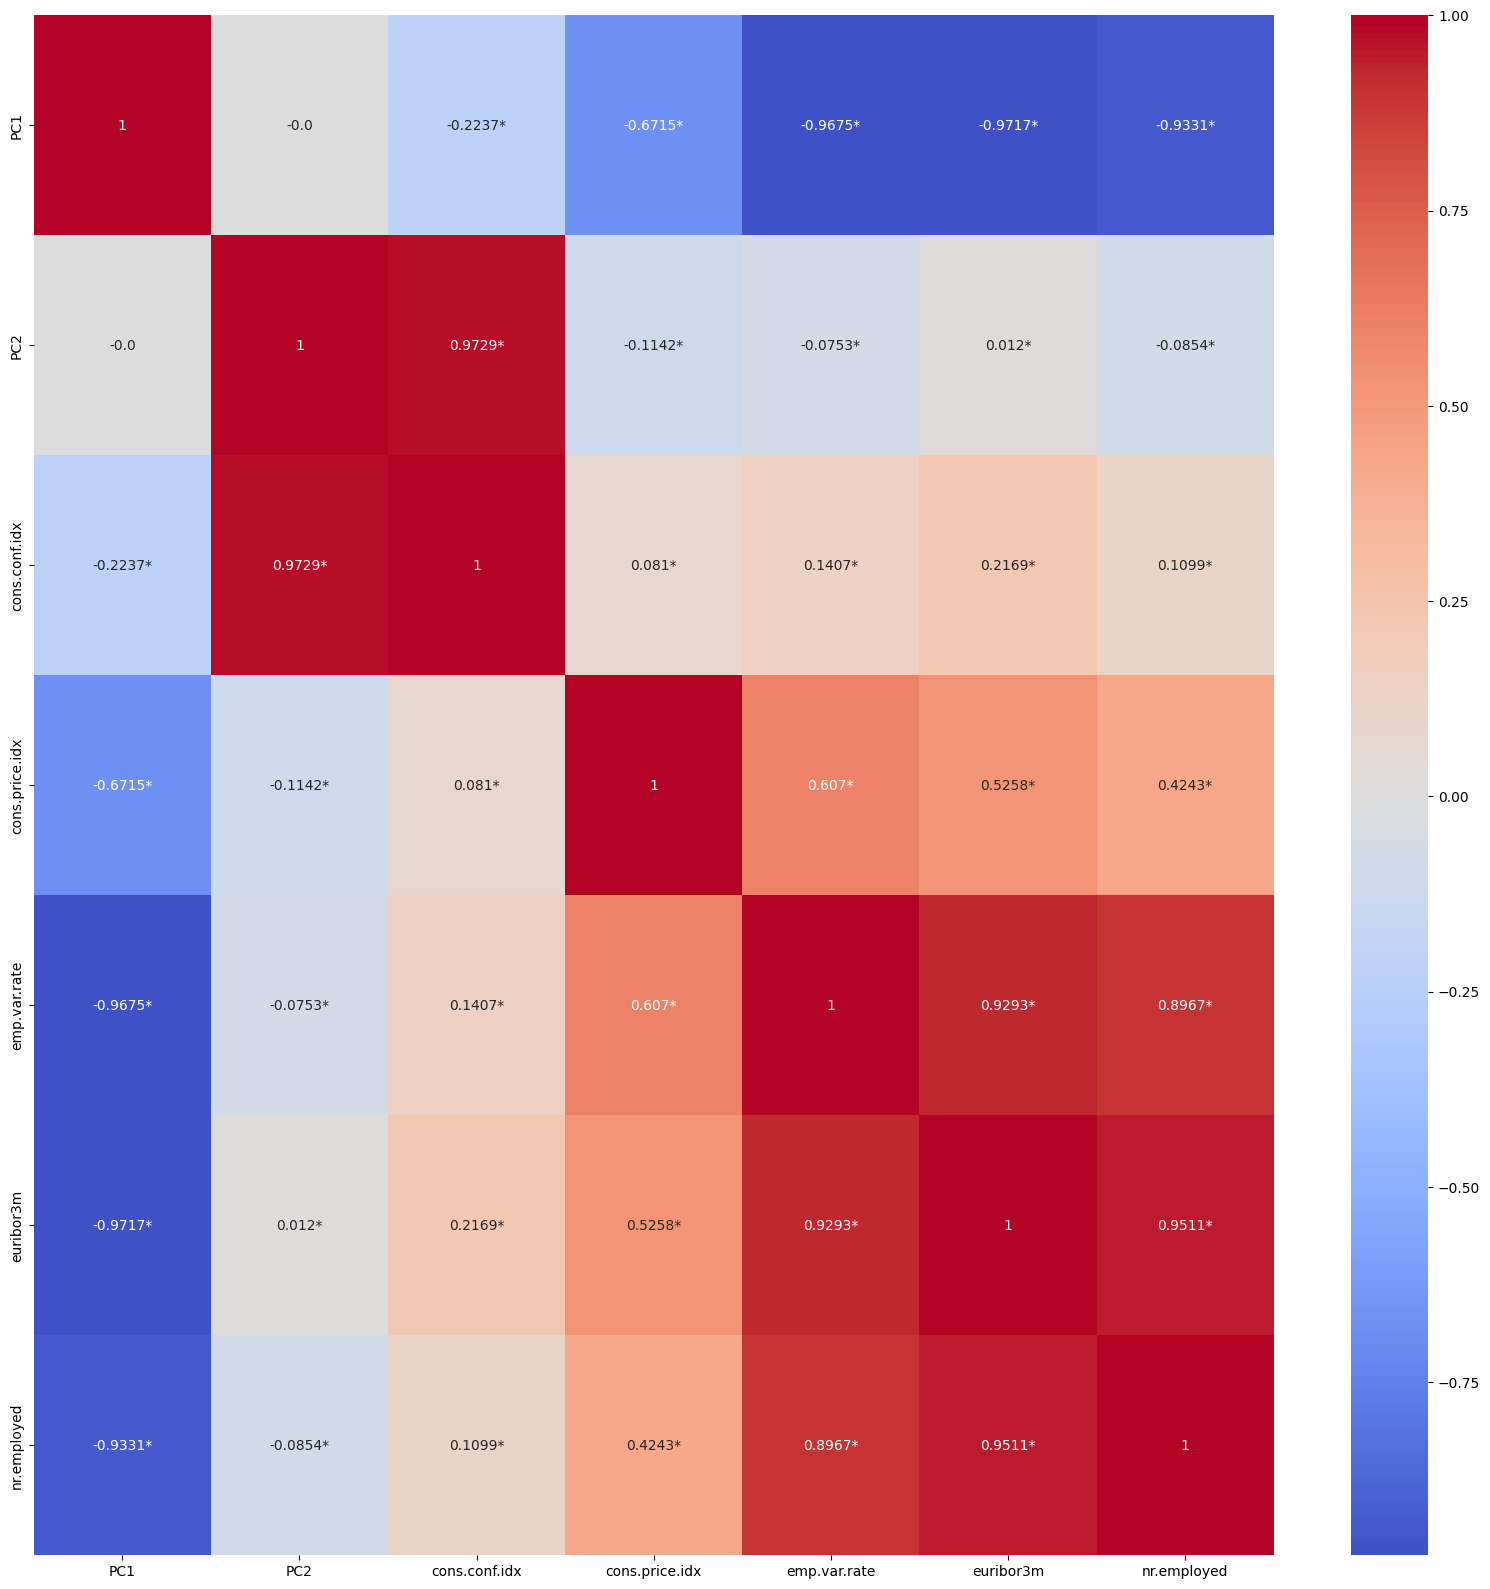

In [139]:
principal_components = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
point_biserial_correlation(principal_components.join(economic_factors),plot=True);

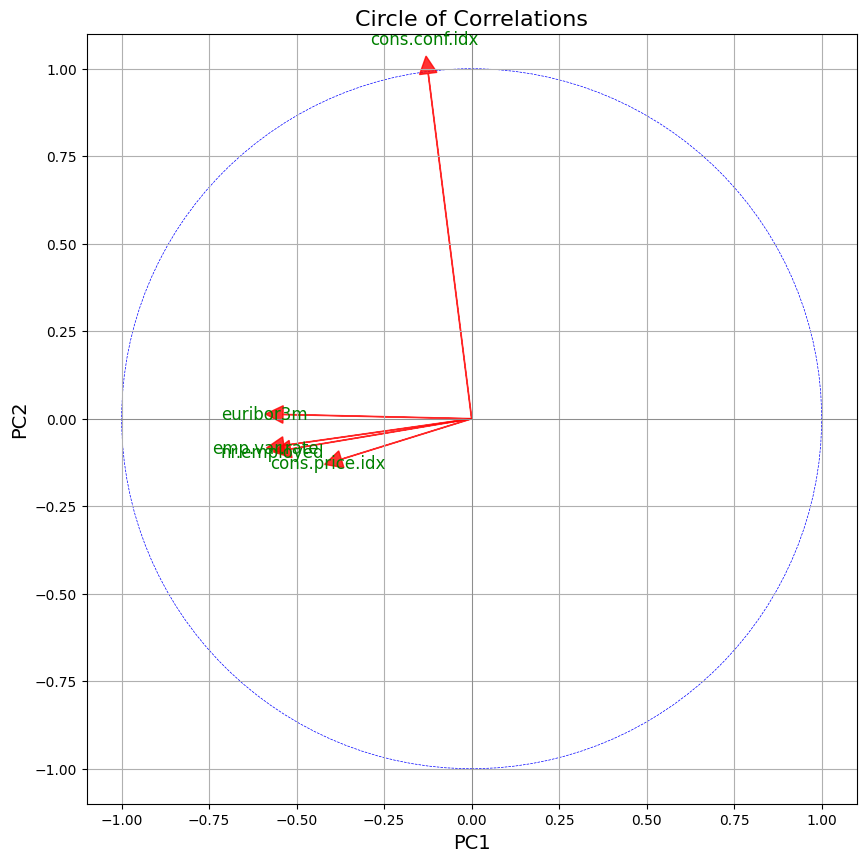

In [140]:
pcs = pca.components_
plt.figure(figsize=(10, 10))

circle = plt.Circle((0, 0), 1, color='b', fill=False, linestyle='--', linewidth=0.5)
plt.gca().add_artist(circle)

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    plt.arrow(0, 0, x, y, color='r', alpha=0.8, head_width=0.05, head_length=0.05)
    plt.text(x * 1.1, y * 1.1, economic_factors.columns.tolist()[i], color='g', ha='center', va='center', fontsize=12)

plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.xlabel("PC1", fontsize=14)
plt.ylabel("PC2", fontsize=14)
plt.title("Circle of Correlations", fontsize=16)
plt.grid()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

- **Interpreting the Factors**
   1. **Factor 1 (PC1)**:
      - Represents **macroeconomic stability or growth**:
        - High values in PC1 might indicate periods of economic contraction (e.g., low employment, falling interest rates).
        - Low values in PC1 might indicate a stable or growing economy.

   2. **Factor 2 (PC2)**:
      - Represents **consumer sentiment**:
        - High PC2 values are linked to optimistic consumer confidence.
        - Low PC2 values might reflect consumer pessimism or uncertainty.

Therefore, we can drop the secondary components to simplify the model and focus on the primary factors driving economic conditions, droping the representative variables with the first component.

In [ ]:
scaler = StandardScaler()
economic_factors = data[['cons.price.idx', 'cons.conf.idx', 'emp.var.rate','euribor3m', 'nr.employed']]
economic_factors_scaled = scaler.fit_transform(economic_factors)

pca = PCA(n_components=1)
principal_components = pca.fit_transform(economic_factors_scaled)


data_analysis['Econ.Stab.Sent.PCA']=principal_components[:,0]

data_analysis=data_analysis.drop(['cons.price.idx', 'emp.var.rate','euribor3m', 'nr.employed'], axis=1)

<Axes: >

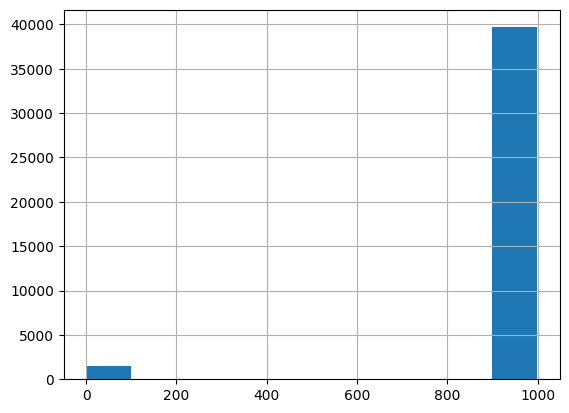

In [142]:
data_analysis['pdays'].hist()

<Axes: >

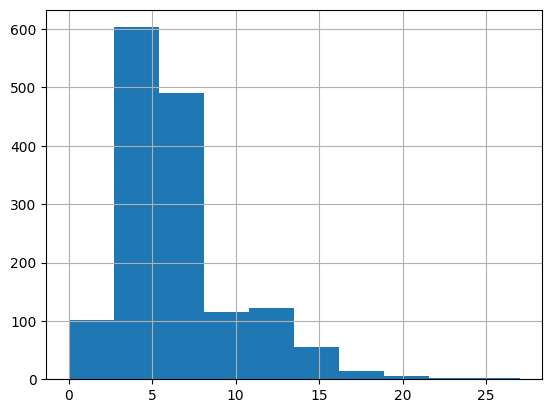

In [143]:
data_analysis.loc[lambda df: df['pdays']<999,'pdays'].hist()

In [144]:
data_analysis['pdays']= pd.cut(data_analysis['pdays'].replace(999, -1), 
                            bins=[-1, 0, 999],
                            right=False,
                            labels=['Never Contacted', 'Contacted']).rename("cutt")

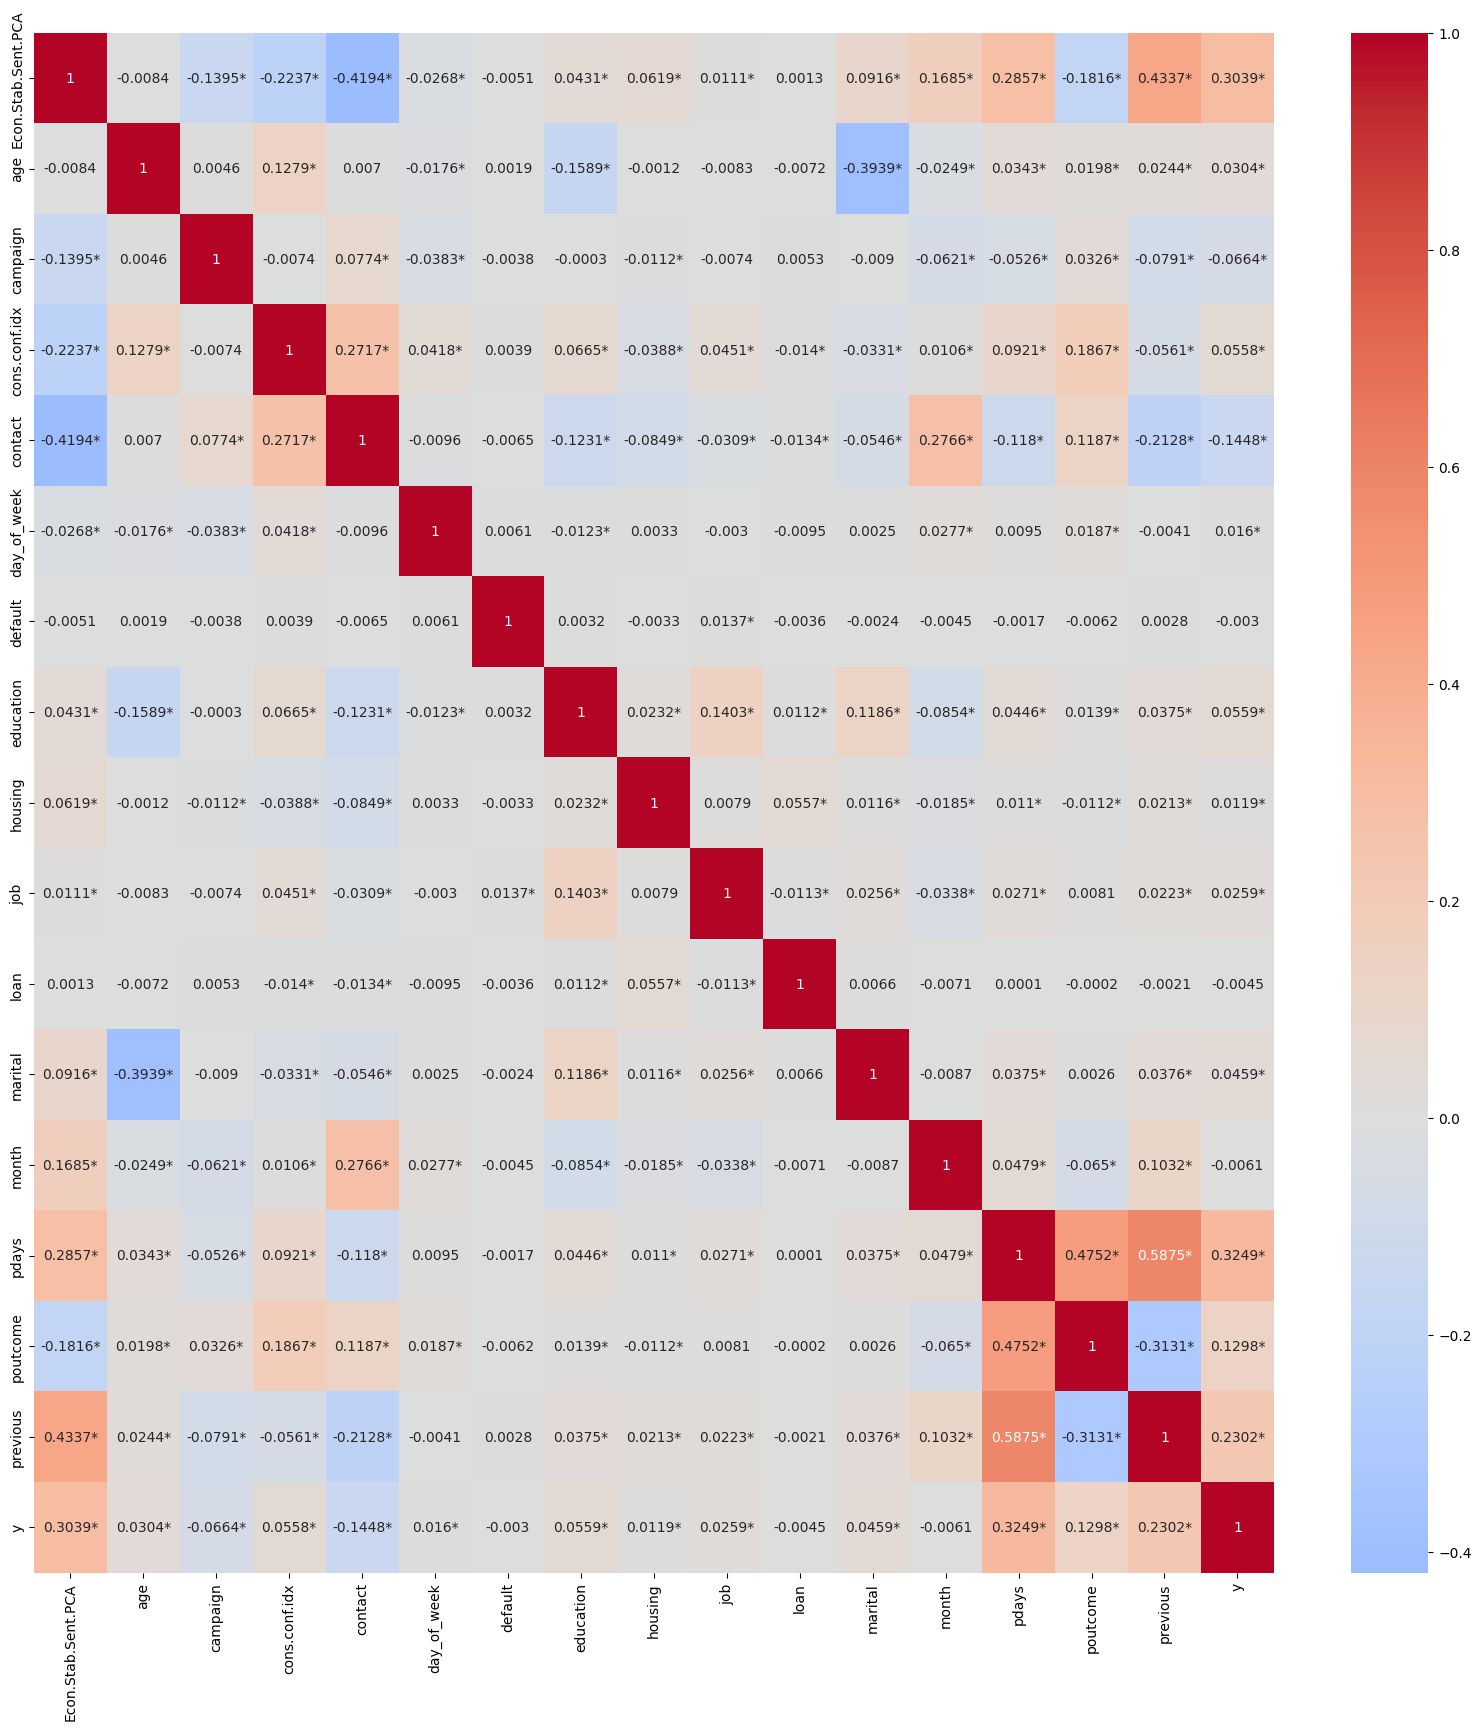

In [145]:
point_biserial_correlation(data_analysis,plot=True)
# point_biserial_correlation(data[['age',  'job',  'marital',  'education',  'default',  
#                                     'contact',  'month',  'day_of_week',  'campaign',  
#                                     'pdays',  'previous',  'poutcome',  
#                                     'cons.price.idx',  'euribor3m']],plot=True)

#### side note

In [146]:
df_wk  =  pd.DataFrame(data[['age',  'job',  'marital',  'education','contact',
                             'month',  'day_of_week',  'campaign',
                             'pdays',  'previous',  'poutcome',  
                             'cons.price.idx',  'euribor3m','y']])
df_wk['pdays']  =  df_wk['pdays'].apply(lambda  x:  1  if  x !=  999  else  0)  
df_wk

,age,job,marital,education,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,euribor3m,y
0,56,housemaid,married,basic.4y,telephone,may,mon,1,0,0,nonexistent,93,4,no
1,57,services,married,high.school,telephone,may,mon,1,0,0,nonexistent,93,4,no
2,37,services,married,high.school,telephone,may,mon,1,0,0,nonexistent,93,4,no
3,40,admin.,married,basic.6y,telephone,may,mon,1,0,0,nonexistent,93,4,no
4,56,services,married,high.school,telephone,may,mon,1,0,0,nonexistent,93,4,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,cellular,nov,fri,1,0,0,nonexistent,94,1,yes
41184,46,blue-collar,married,professional.course,cellular,nov,fri,1,0,0,nonexistent,94,1,no
41185,56,retired,married,university.degree,cellular,nov,fri,2,0,0,nonexistent,94,1,no
41186,44,technician,married,professional.course,cellular,nov,fri,1,0,0,nonexistent,94,1,yes


In [147]:
set(data.columns)- set(df_wk.columns) 

{'cons.conf.idx', 'default', 'emp.var.rate', 'housing', 'loan', 'nr.employed'}

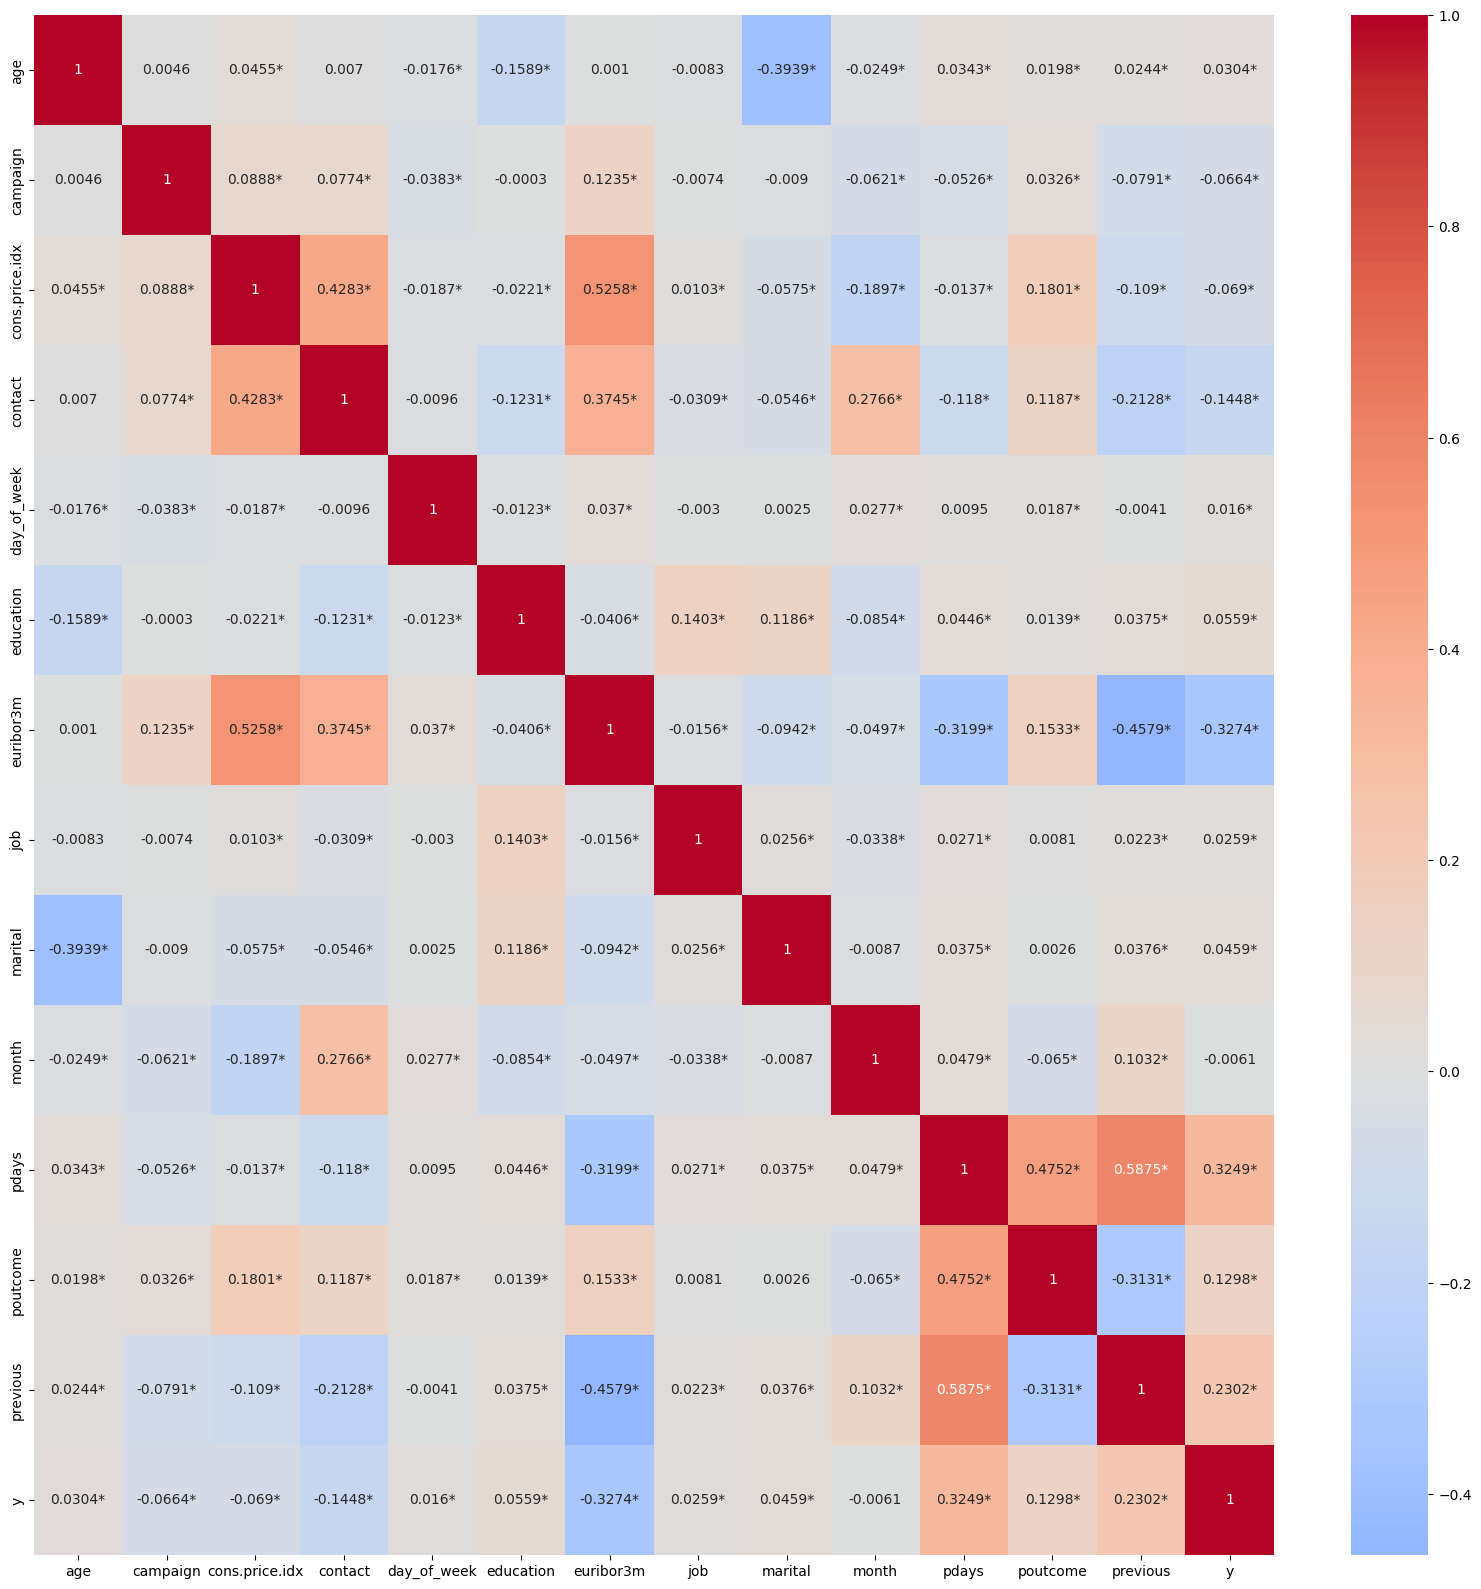

In [148]:
point_biserial_correlation(df_wk,plot=True)

# Model Creation

In [149]:
point_biserial_correlation(data_analysis).loc["y"]

Econ.Stab.Sent.PCA     0.3039*
age                    0.0304*
campaign              -0.0664*
cons.conf.idx          0.0558*
contact               -0.1448*
day_of_week             0.016*
default                 -0.003
education              0.0559*
housing                0.0119*
job                    0.0259*
loan                   -0.0045
marital                0.0459*
month                  -0.0061
pdays                  0.3249*
poutcome               0.1298*
previous               0.2302*
y                            1
Name: y, dtype: object

In [150]:
from sklearn.pipeline import Pipeline
from sklearn import preprocessing as preproc

In [161]:
from typing import Literal

class Preprocessing(BaseEstimator, TransformerMixin):
    def __init__(self, scale: bool = True, encode: Literal["Categorical", "OneHot", False] = False):
        self.scale = scale
        self.encode = encode

    def fit(self, X, y=None):
        """
        Fit encoders and scalers to the data.
        """
        self.cat_cols_ = X.select_dtypes(include=["category"]).columns.tolist()
        self.num_cols_ = X.select_dtypes(include=[np.number]).columns.tolist()

        if self.cat_cols_:
            if self.encode == "Categorical":
                self.cat_encoder_ = CategoricalEncoder().fit(X[self.cat_cols_])
            elif self.encode == "OneHot":
                self.cat_encoder_ = preproc.OneHotEncoder(sparse_output=False, handle_unknown="error").fit(X[self.cat_cols_])

        if self.scale and self.num_cols_:
            self.num_scaler_ = preproc.StandardScaler().fit(X[self.num_cols_])

        if y is not None:
            self.label_encoder_ = preproc.LabelEncoder().fit(y)

        return self

    def transform(self, X, y=None):
        X_transformed = X.copy()

        if self.encode and self.cat_cols_:
            if self.encode == "OneHot":
                encoded_cols = self.cat_encoder_.transform(X_transformed[self.cat_cols_])
                encoded_df = pd.DataFrame(encoded_cols, columns=self.cat_encoder_.get_feature_names_out(self.cat_cols_), index=X_transformed.index)
                X_transformed = X_transformed.drop(columns=self.cat_cols_).join(encoded_df)
            else:
                X_transformed[self.cat_cols_] = self.cat_encoder_.transform(X_transformed[self.cat_cols_])

        if self.scale and self.num_cols_:
            X_transformed[self.num_cols_] = self.num_scaler_.transform(X_transformed[self.num_cols_])

        y_transformed = None
        if y is not None and hasattr(self, "label_encoder_"):
            y_transformed = self.label_encoder_.transform(y)

        return X_transformed, y_transformed

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X, y)


In [203]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

class DataTransformer(BaseEstimator, TransformerMixin):
    def __init__(self,knn=False,n_neighbors=5, n_components=1):
        self.n_neighbors = n_neighbors
        self.n_components = n_components
        self.knn = knn
        self.categories_ = {}
        self.knn_imputer = KNNImputer(n_neighbors=self.n_neighbors)
        self.pca = PCA(n_components=1)
        self.scaler = StandardScaler()

    def fit(self, X, y=None):

        self.categories_ = {col: X[col].cat.categories for col in X.select_dtypes(include='category').columns}
        self.knn_imputer.fit(X)
        self.scaler.fit(X.select_dtypes(include=[np.number]))  # Scale only numeric data
        return self

    def transform(self, X):
        if self.knn:
            X_copy_imputed = self.knn_imputer.transform(X.copy().replace(-1, np.nan)) 
        else:
            X_copy_imputed = X.copy()
        # Apply PCA to economic factors
        economic_factors = X[['cons.price.idx', 'cons.conf.idx', 'emp.var.rate','euribor3m', 'nr.employed']]
        economic_factors_scaled = StandardScaler().fit_transform(economic_factors)
        pca = PCA(n_components=1)
        principal_components =  self.pca.fit_transform(economic_factors_scaled)

        X_copy_imputed['Econ.Stab.Sent.PCA']=principal_components[:,0]

        X_copy_imputed=X_copy_imputed.drop(['cons.price.idx', 'emp.var.rate','euribor3m', 'nr.employed'], axis=1)
        
        # Encode categorical columns
        for column in X_copy_imputed.select_dtypes(include='category').columns:
            X_copy_imputed[column] = X_copy_imputed[column].cat.codes
        X_copy_imputed['pdays']= pd.cut(X['pdays'].replace(999, -1), 
                            bins=[-1, 0, 999],
                            right=False,
                            labels=['Never Contacted', 'Contacted']).rename("cutt")
        return X_copy_imputed



In [204]:
encoder = CategoricalEncoder()
data_encoded = encoder.fit_transform(data)
dt=DataTransformer()
fillna_df = dt.fit_transform(data_encoded)
data_analysis_=encoder.inverse_transform(fillna_df)

In [205]:
data_analysis_[["Econ.Stab.Sent.PCA"]].join(data_analysis[["Econ.Stab.Sent.PCA"]].rename(columns={"Econ.Stab.Sent.PCA":"Econ.Stab.Sent.PCA_old"}))

,Econ.Stab.Sent.PCA,Econ.Stab.Sent.PCA_old
0,-1,-1.108262
1,-1,-1.108262
2,-1,-1.108262
3,-1,-1.108262
4,-1,-1.108262
...,...,...
41183,2,2.261464
41184,2,2.261464
41185,2,2.261464
41186,2,2.261464


In [85]:
X, y = Preprocessing(encode='OneHot').fit_transform(data_analysis.drop(columns='y'), data_analysis['y'])


## side note model

In [118]:
from imblearn.over_sampling import SMOTE
from  imblearn.combine  import  SMOTEENN

from sklearn.model_selection import train_test_split

resampler = SMOTEENN(random_state=42)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

from sklearn.svm import SVC
from sklearn.metrics import classification_report

svc_model = SVC(kernel='linear', random_state=777)
x_resampled, y_resampled = resampler.fit_resample(x_train, y_train)
# Train the model
svc_model.fit(x_resampled, y_resampled)

# Predict on the test set
y_pred_svc = svc_model.predict(x_test)

# Evaluate the model
print(classification_report(y_test, y_pred_svc))


              precision    recall  f1-score   support

           0       0.95      0.72      0.82      7303
           1       0.24      0.71      0.36       935

    accuracy                           0.72      8238
   macro avg       0.60      0.71      0.59      8238
weighted avg       0.87      0.72      0.77      8238



In [108]:
from  imblearn.combine  import  SMOTEENN
from sklearn.model_selection import train_test_split

smoteenn = SMOTEENN(random_state=42)
x_resampled, y_resampled = smoteenn.fit_resample(X, y)
print('After sampling yes:', np.count_nonzero(y_resampled == 1))
print('After sampling no:', np.count_nonzero(y_resampled == 0))


After sampling yes: 32175
After sampling no: 25086


In [109]:

# Split the training data into 80% and the evaluation data into 20%
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

# Further split the training data into 80% training data and 20% validation data
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# x_train = pd.DataFrame(x_train)
# y_train = pd.get_dummies(y_train)
# x_val = pd.DataFrame(x_val)
# y_val = pd.get_dummies(y_val)
# x_test = pd.DataFrame(x_test)
# y_test_ = pd.get_dummies(y_test)


In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=777)

# Train the model
rf_model.fit(x_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(x_test)

# Evaluate the model
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.96      0.98      0.97      4970
           1       0.99      0.97      0.98      6483

    accuracy                           0.98     11453
   macro avg       0.98      0.98      0.98     11453
weighted avg       0.98      0.98      0.98     11453



In [111]:
eval_model(rf_model,X_train=x_train,y_train=y_train,X_test=x_test,y_test=y_test)[0]

precision    recall  f1-score       support       AUC
metric       dataset                                                       
0            test      0.964490  0.983702  0.974001   4970.000000  0.996441
             train     1.000000  1.000000  1.000000  16019.000000  1.000000
1            test      0.987312  0.972235  0.979716   6483.000000  0.996441
             train     1.000000  1.000000  1.000000  20627.000000  1.000000
accuracy     test      0.977211  0.977211  0.977211      0.977211  0.996441
             train     1.000000  1.000000  1.000000      1.000000  1.000000
macro avg    test      0.975901  0.977969  0.976858  11453.000000  0.996441
             train     1.000000  1.000000  1.000000  36646.000000  1.000000
weighted avg test      0.977408  0.977211  0.977236  11453.000000  0.996441
             train     1.000000  1.000000  1.000000  36646.000000  1.000000

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
num_folds = 5


### DecisionTreeClassifier

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Initialize the DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [46]:
feature_importances = dt_model.feature_importances_

feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

feature_importances_df


,Feature,Importance
0,age,0.182974
50,pdays_Never Contacted,0.109486
1,campaign,0.096728
4,Econ.Stab.Sent.PCA,0.090668
3,cons.conf.idx,0.031864
29,housing_yes,0.029595
17,marital_married,0.024879
28,housing_no,0.024814
45,day_of_week_mon,0.023650
48,day_of_week_wed,0.022119


In [47]:
print(metrics.classification_report(y_train, dt_model.predict(X_train)))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00     25583
           1       1.00      0.95      0.97      3248

    accuracy                           0.99     28831
   macro avg       1.00      0.97      0.98     28831
weighted avg       0.99      0.99      0.99     28831



In [48]:
print(metrics.classification_report(y_train, np.zeros_like(y_train)))


              precision    recall  f1-score   support

           0       0.89      1.00      0.94     25583
           1       0.00      0.00      0.00      3248

    accuracy                           0.89     28831
   macro avg       0.44      0.50      0.47     28831
weighted avg       0.79      0.89      0.83     28831



c:\Users\amine\OneDrive\Documents\Dauphine\ML\ml-python\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\amine\OneDrive\Documents\Dauphine\ML\ml-python\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\amine\OneDrive\Documents\Dauphine\ML\ml-python\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [104]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def eval_model(model,train=False,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test, print_report=False):
    if train:
        model.fit(X_train, y_train)
    
    # Predict class labels
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Predict probabilities for AUC
    y_pred_prob_train = model.predict_proba(X_train)[:, 1]
    y_pred_prob_test = model.predict_proba(X_test)[:, 1]
    
    # Calculate AUC
    train_auc = roc_auc_score(y_train, y_pred_prob_train)
    test_auc = roc_auc_score(y_test, y_pred_prob_test)
    
    # Get classification reports
    train_report = metrics.classification_report(y_train, y_pred_train, output_dict=True)
    test_report = metrics.classification_report(y_test, y_pred_test, output_dict=True)
    
    # Convert reports to DataFrames
    train_df = pd.DataFrame(train_report).transpose()
    test_df = pd.DataFrame(test_report).transpose()
    
    if print_report:
        print("Report for train data")
        print(train_df)
        print("-" * 50)
        print("Report for test data")
        print(test_df)
        print("-" * 50)
    
    # Add dataset column for distinguishing train/test data
    train_df['dataset'] = 'train'
    test_df['dataset'] = 'test'
    combined_df = pd.concat([train_df, test_df]).reset_index().rename(columns={'index': 'metric'})
    
    combined_df['AUC'] = combined_df.apply(lambda row: train_auc if row["dataset"] == 'train' else test_auc, axis=1)
    combined_df = combined_df.set_index(["metric", 'dataset']).sort_index()

    # Add AUC as a new column

    # Calculate confusion matrix
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test)

    return combined_df, confusion_matrix

combined_df, confusion_matrix = eval_model(dt_model)



ValueError: Found input variables with inconsistent numbers of samples: [36751, 28831]

In [50]:
combined_df

precision    recall  f1-score       support       AUC
metric       dataset                                                       
0            test      0.914006  0.903420  0.908682  10965.000000  0.619577
             train     0.993167  0.999922  0.996533  25583.000000  0.999803
1            test      0.302831  0.330460  0.316043   1392.000000  0.619577
             train     0.999349  0.945813  0.971844   3248.000000  0.999803
accuracy     test      0.838877  0.838877  0.838877      0.838877  0.619577
             train     0.993826  0.993826  0.993826      0.993826  0.999803
macro avg    test      0.608419  0.616940  0.612362  12357.000000  0.619577
             train     0.996258  0.972867  0.984189  28831.000000  0.999803
weighted avg test      0.845158  0.838877  0.841922  12357.000000  0.619577
             train     0.993863  0.993826  0.993752  28831.000000  0.999803

In [230]:
from sklearn.model_selection import GridSearchCV

def perform_grid_search(model, param_grid, X_train, y_train, cv, scoring='roc_auc'):
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=cv,
        scoring=scoring,
    )
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    print("Best hyperparameters: ", best_params)
    best_model = model.set_params(**best_params)
    return best_model.fit(X_train, y_train)

# Decision Tree Classifier
param_grid_dt = {
    "max_depth": [2,8, 2**4, 2**6],
    "min_samples_split": [4, 8, 15],
    "min_samples_leaf": [2, 4, 8],
}

dt_model = DecisionTreeClassifier(random_state=42)
best_dt_p = perform_grid_search(dt_model, param_grid_dt, X_train, y_train, num_folds)


Best hyperparameters:  {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 4}


In [231]:
best_dt_f1 = perform_grid_search(dt_model, param_grid_dt, X_train, y_train, num_folds,scoring='f1_weighted')

Best hyperparameters:  {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 8}


In [232]:
pd.DataFrame(index=[])

""


In [233]:
print("\nbest_dt_p\n",eval_model(best_dt_p)[0].loc[pd.IndexSlice[["0", "1"], ['test']], ["precision","recall","f1-score","AUC"]])
print("\nbest_dt_f1\n",eval_model(best_dt_f1)[0].loc[pd.IndexSlice[["0", "1"], ['test']], ["precision","recall","f1-score","AUC"]])



best_dt_p
                 precision    recall  f1-score       AUC
metric dataset                                         
0      test      0.912026  0.981395  0.945440  0.785313
1      test      0.634409  0.254310  0.363077  0.785313

best_dt_f1
                 precision    recall  f1-score       AUC
metric dataset                                         
0      test      0.912026  0.981395  0.945440  0.785313
1      test      0.634409  0.254310  0.363077  0.785313


In [234]:
feature_importances = dt_model.feature_importances_

feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

feature_importances_df.head(15)


,Feature,Importance
50,pdays_Never Contacted,0.405695
4,Econ.Stab.Sent.PCA,0.295490
3,cons.conf.idx,0.071302
0,age,0.059221
1,campaign,0.023939
33,contact_telephone,0.021709
42,month_oct,0.021065
2,previous,0.014810
45,day_of_week_mon,0.012630
14,job_technician,0.006414


### Logistic Regression

In [235]:
from sklearn.linear_model import LogisticRegression
param_grid_lr = {
    "penalty": ["l1", "l2", "elasticnet", "none"],
    "C": [0.01, 0.1, 1, 10, 100],
    "solver": ["lbfgs", "liblinear", "saga"]
}

best_lr = perform_grid_search(LogisticRegression(random_state=42, max_iter=1000), param_grid_lr, X_train, y_train, num_folds)

c:\Users\amine\OneDrive\Documents\Dauphine\ML\ml-python\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\amine\OneDrive\Documents\Dauphine\ML\ml-python\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\amine\OneDrive\Documents\Dauphine\ML\ml-python\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\amine\OneDrive\Documents\Dauphine\ML\ml-python\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\amine\OneDrive\Document

Best hyperparameters:  {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [236]:
eval_model(best_lr)[0].loc[pd.IndexSlice[["0", "1"], ['train','test']], :]

precision    recall  f1-score  support       AUC
metric dataset                                                  
0      train     0.906538  0.986905  0.945016  25583.0  0.786513
       test      0.906057  0.990424  0.946364  10965.0  0.799614
1      train     0.658163  0.198584  0.305109   3248.0  0.786513
       test      0.716981  0.191092  0.301758   1392.0  0.799614

### Random Forest Classifier

In [238]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [239]:
eval_model(rf_model)[0].loc[pd.IndexSlice[["0", "1"], ['train','test']], :]

precision    recall  f1-score  support       AUC
metric dataset                                                  
0      train     0.993665  0.999335  0.996492  25583.0  0.999732
       test      0.913197  0.968080  0.939838  10965.0  0.771128
1      train     0.994520  0.949815  0.971654   3248.0  0.999732
       test      0.522510  0.275144  0.360471   1392.0  0.771128

In [240]:
param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 10, 20],
    "min_samples_leaf": [1, 5, 10],
    "bootstrap": [True, False]
}

best_rf = perform_grid_search(RandomForestClassifier(random_state=42), param_grid_rf, X_train, y_train, num_folds)

Best hyperparameters:  {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 200}


In [241]:
eval_model(best_rf)[0].loc[pd.IndexSlice[["0", "1"], ['train','test']], :]

precision    recall  f1-score  support       AUC
metric dataset                                                  
0      train     0.909777  0.990111  0.948245  25583.0  0.820515
       test      0.906913  0.990698  0.946955  10965.0  0.807383
1      train     0.744186  0.226601  0.347416   3248.0  0.820515
       test      0.730871  0.198994  0.312818   1392.0  0.807383

### Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)

gb_model.fit(X_train, y_train)
param_grid_gb = {
    "max_depth": [2, 6, 10],
    "n_estimators": [25, 50, 150, 250],
    "learning_rate": [0.3, 0.5],
    "subsample": [0.3, 0.5],
    "min_samples_split": [2, 8, 15]
}

best_gb = perform_grid_search(GradientBoostingClassifier(random_state=42), param_grid_gb, X_train, y_train, num_folds)

Best hyperparameters:  {'learning_rate': 0.3, 'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 25, 'subsample': 0.5}


In [ ]:
eval_model(best_gb)[0].loc[pd.IndexSlice[["0", "1"], ['train','test']], :]

precision    recall  f1-score  support
metric dataset                                        
0      train     0.908934  0.987062  0.946388  25583.0
       test      0.907856  0.987506  0.946007  10965.0
1      train     0.684461  0.221059  0.334187   3248.0
       test      0.681395  0.210489  0.321625   1392.0

### Extreme Gradient Boosting Classifier

In [ ]:
from xgboost import XGBClassifier

gb_model = GradientBoostingClassifier(random_state=42)

gb_model.fit(X_train, y_train)
xgb_model = XGBClassifier(random_state=42)

param_grid_xgb = {
    "max_depth": [2, 6, 10],
    "n_estimators": [25, 50, 150, 250],
    "learning_rate": [0.3, 0.5],
    "subsample": [0.3, 0.5],
    "min_child_weight": [1, 5, 10]
}

best_xgb = perform_grid_search(xgb_model, param_grid_xgb, X_train, y_train, num_folds)

Best hyperparameters:  {'learning_rate': 0.3, 'max_depth': 2, 'min_child_weight': 10, 'n_estimators': 25, 'subsample': 0.5}


In [ ]:
eval_model(best_xgb)[0].loc[pd.IndexSlice[["0", "1"], ['train','test']], :]

precision    recall  f1-score  support
metric dataset                                        
0      train     0.908309  0.987023  0.946032  25583.0
       test      0.906804  0.989421  0.946313  10965.0
1      train     0.677983  0.215209  0.326712   3248.0
       test      0.704835  0.198994  0.310364   1392.0

In [ ]:
params = {
    'learning_rate': 0.1,
    'max_depth': 2,
    'n_estimators': 25,
    'subsample': 0.3
}

# Train the Model
best_model_theo = XGBClassifier(**params)
best_model_theo.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=25, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
eval_model(best_model_theo)[0].loc[pd.IndexSlice[["0", "1"], ['train','test']], :]

precision    recall  f1-score  support
metric dataset                                        
0      train     0.903271  0.991010  0.945108  25583.0
       test      0.903001  0.993342  0.946020  10965.0
1      train     0.698558  0.164101  0.265769   3248.0
       test      0.752542  0.159483  0.263189   1392.0

### Support Vector Machine

In [ ]:
from sklearn.svm import SVC
param_grid_svm = {
    "C": [0.1, 1, 10, 100],
    "gamma": [1, 0.1, 0.01, 0.001],
    "kernel": ["linear", "rbf"]
}

best_svm = perform_grid_search(SVC(random_state=42,class_weight='balanced'), param_grid_svm, X_train, y_train, num_folds)

KeyboardInterrupt: 

In [ ]:
eval_model(best_svm)[0].loc[pd.IndexSlice[["0", "1"], ['train','test']], :]

### Support Vector Machine

In [ ]:
break 
from sklearn.svm import SVC
param_grid_svm = {
    "C": [0.1, 1, 10, 100],
    "gamma": [1, 0.1, 0.01, 0.001],
    "kernel": ["linear", "rbf"]
}

best_svm = perform_grid_search(SVC(random_state=42), param_grid_svm, X_train, y_train, num_folds)

In [ ]:
eval_model(best_svm)[0].loc[pd.IndexSlice[["0", "1"], ['train','test']], :]